# Analisando as notas em geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
notas = pd.read_csv('rating.csv', sep=',')
notas.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [3]:
#Exibindo o formato do nosso dataset
notas.shape

(20000263, 4)

In [4]:
# Renomeando colunas
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [5]:
notas["nota"].unique()

array([3.5, 4. , 3. , 4.5, 5. , 2. , 1. , 2.5, 0.5, 1.5])

In [6]:
notas["nota"].value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: nota, dtype: int64

# Analisando média geral das notas

In [7]:
notas["nota"].mean()

3.5255285642993797

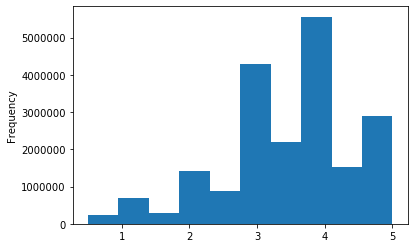

In [8]:
notas["nota"].plot(kind="hist")

In [9]:
print("Media:", notas["nota"].mean())
print("Mediana:", notas["nota"].median())

Media: 3.5255285642993797
Mediana: 3.5


In [10]:
# Descrição geral do nosso dataset
notas["nota"].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: nota, dtype: float64

In [11]:
import seaborn as sns

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


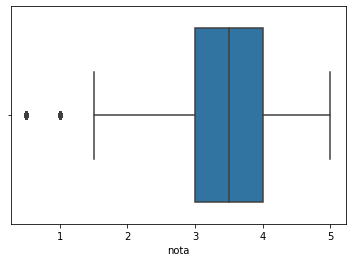

In [12]:
sns.boxplot(notas["nota"])

In [13]:
filmes = pd.read_csv('movie.csv', sep=',')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando notas específicas

In [15]:
#Podemos criar query para filtrar campos específicos
notas.query("filmeId==1").nota.mean()

3.921239561324077

In [16]:
medias_por_filme = notas.groupby("filmeId").mean()["nota"]
medias_por_filme.head()

filmeId
1    3.921240
2    3.211977
3    3.151040
4    2.861393
5    3.064592
Name: nota, dtype: float64

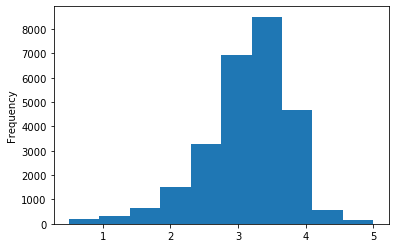

In [17]:
medias_por_filme.plot(kind="hist")

In [18]:
medias_por_filme.describe()

count    26744.000000
mean         3.133200
std          0.664084
min          0.500000
25%          2.800000
50%          3.235294
75%          3.565217
max          5.000000
Name: nota, dtype: float64

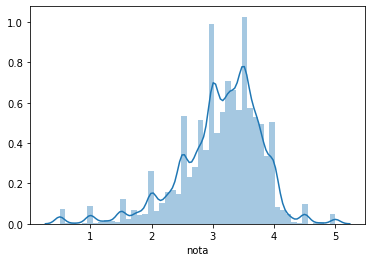

In [19]:
# O seaborn por padrão define um número de bins
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

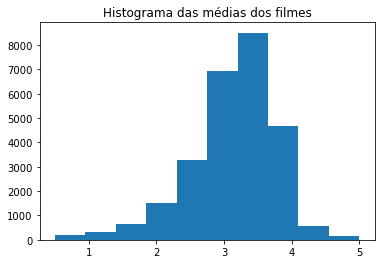

In [20]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

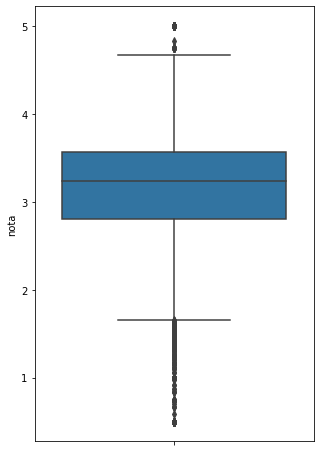

In [21]:
#Exemplo usando seaborn e matplot de uma visualização no eixo y
plt.figure(figsize=(5, 8))
sns.boxplot(y=medias_por_filme)

In [22]:
imdb = pd.read_csv("movie_metadata.csv", sep=',')
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [23]:
imdb["language"].unique()

array(['English', nan, 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'Icelandic', 'German', 'Aramaic', 'Italian',
       'Dutch', 'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish',
       'Korean', 'Thai', 'Polish', 'Bosnian', 'None', 'Hungarian',
       'Portuguese', 'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada',
       'Zulu', 'Panjabi', 'Tamil', 'Dzongkha', 'Vietnamese', 'Indonesian',
       'Urdu', 'Romanian', 'Persian', 'Slovenian', 'Greek', 'Swahili'],
      dtype=object)

In [24]:
contagem_de_linguas = imdb["language"].value_counts().to_frame().reset_index() #Transforma em dataframe e reseta o index
contagem_de_linguas.columns = ["original_language", "total"]
contagem_de_linguas.head()

,original_language,total
0,English,4704
1,French,73
2,Spanish,40
3,Hindi,28
4,Mandarin,26


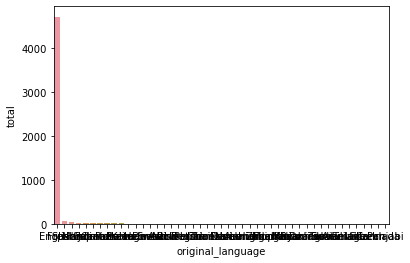

In [25]:
#Plotando categorias 
sns.barplot(x="original_language", y="total", data=contagem_de_linguas)

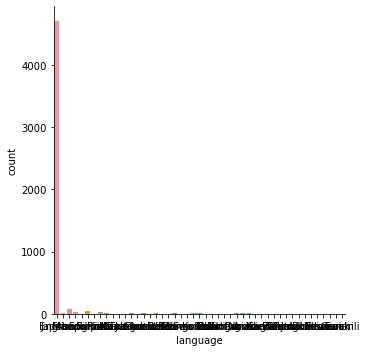

In [26]:
#Plotando diretamente pelos dados de categoria com catplot
sns.catplot(x='language', kind='count', data=imdb)

([<matplotlib.patches.Wedge at 0x17e852df4c8>,
 [Text(-1.077147181802304, 0.22305593185422004, 'English'),
  Text(1.0283960314815082, -0.39038647829181394, 'French'),
  Text(1.053360661171484, -0.31690900507302444, 'Spanish'),
  Text(1.0658638414106296, -0.27190857208513397, 'Hindi'),
  Text(1.0744249864301298, -0.23581973737288228, 'Mandarin'),
  Text(1.080626511956493, -0.2055391487204895, 'German'),
  Text(1.085086559413178, -0.180519136328733, 'Japanese'),
  Text(1.0881774811025866, -0.16084082075527317, 'Cantonese'),
  Text(1.090284332826141, -0.14587691247711815, 'Russian'),
  Text(1.092185420526222, -0.13088547356356978, 'Italian'),
  Text(1.093661403314559, -0.11791833996469579, 'Korean'),
  Text(1.094784937790918, -0.10698569991422312, 'Portuguese'),
  Text(1.0956173455382472, -0.09809501595761728, 'Hebrew'),
  Text(1.09620853203772, -0.09125159882274593, 'Danish'),
  Text(1.0967569737793366, -0.08440462348942811, 'Swedish'),
  Text(1.0972626493775586, -0.07755435694363692, 'A

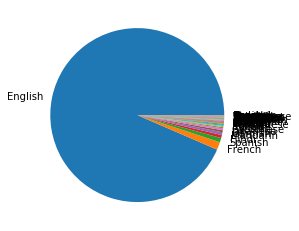

In [27]:
# Exepmlo de uso do gráfico de pizza, 
# porém ele quanse nunca é utilizado por ser pouco informativo pela dificuldade de interpreta-lo
plt.pie(contagem_de_linguas["total"], labels=contagem_de_linguas["original_language"])

In [28]:
total_por_lingua = imdb["language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["English"]
total_do_resto = total_geral - total_de_ingles

print(total_de_ingles, total_do_resto)

4704 327


In [29]:
dados = {
   'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4704
1,outros,327


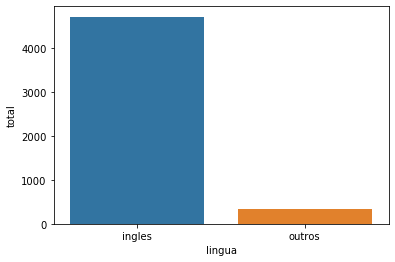

In [30]:
sns.barplot(x=dados["lingua"], y=dados["total"], data=dados)

In [31]:
total_por_lingua_sem_ingles = imdb.query("language != 'English'").iloc[:50].reset_index()
quantidade_por_lingua_nao_inglesa = total_por_lingua_sem_ingles["language"].value_counts()
total_por_lingua_sem_ingles

,index,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
1,98,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
2,204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
3,242,Color,Frédéric Forestier,33.0,116.0,0.0,141.0,Santiago Segura,936.0,NaN,...,36.0,French,France,NaN,78000000.0,2008.0,276.0,5.1,2.35,291
4,279,NaN,Christopher Barnard,NaN,22.0,0.0,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,NaN,0
5,327,Color,Yimou Zhang,136.0,146.0,611.0,28.0,Ni Ni,23000.0,9213.0,...,130.0,Mandarin,China,R,94000000.0,2011.0,196.0,7.6,2.35,13000
6,377,Color,Sydney Pollack,227.0,128.0,521.0,249.0,George Harris,591.0,72515360.0,...,411.0,Aboriginal,UK,PG-13,80000000.0,2005.0,249.0,6.4,2.35,0
7,484,Color,Martin Campbell,137.0,129.0,258.0,163.0,Nick Chinlund,2000.0,45356386.0,...,244.0,Spanish,USA,PG,75000000.0,2005.0,277.0,5.9,2.35,951
8,489,Color,Lucile Hadzihalilovic,63.0,81.0,92.0,8.0,Roxane Duran,23.0,NaN,...,3.0,French,France,NaN,NaN,2015.0,21.0,6.4,2.35,257
9,504,Color,Jacques Perrin,113.0,104.0,63.0,7.0,Jacques Perrin,67.0,19406406.0,...,42.0,French,France,G,40000000.0,2009.0,63.0,7.8,2.35,0


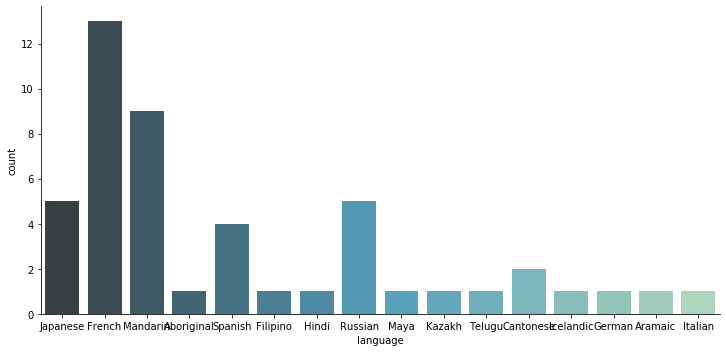

In [32]:
sns.catplot(x='language', kind='count', 
            data=total_por_lingua_sem_ingles, 
            palette='GnBu_d',
            aspect=2)

In [33]:
filmes.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [34]:
notas_do_toy_story = notas.query('filmeId == 1')
notas_do_jumanji = notas.query('filmeId == 2')

print(len(notas_do_toy_story), len(notas_do_jumanji))

49695 22243
